In [25]:
import pandas as pd
pd.set_option('display.width',100000)
pd.set_option('display.max_column',100)
pd.set_option('precision',2)



In [26]:
import io
data=pd.read_csv("C:\\Users\\HP1\\python codes\\docs\\BrainTumorData.csv")
print(data)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst  Unnamed: 32
0      842302         M        17.99         10.38          122.80     1001.0             0.12              0.28        3.00e-01             1.47e-01           0.24                    0.08       1.09        0.91          8.59   153.40       6.40e-03        4.90e-02      5.37e-02           1.59e-02         0.03              6.19e-03         25.38          17.33           184.60      2019.0              0.16               0.67             0.71                  0.27           

In [27]:
data['diagnosis']=data['diagnosis'].apply(lambda x: '1' if x=='M' else '0')
data=data.set_index('id')
del data['Unnamed: 32']
print("After deletion of 'Unnamed: 32' column\n",data)

After deletion of 'Unnamed: 32' column
          diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst
id                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [28]:
import warnings
warnings.filterwarnings(action="ignore")
print(data.groupby('diagnosis').size())

diagnosis
0    357
1    212
dtype: int64


In [29]:
import matplotlib.pyplot as plt
from matplotlib import cm as cm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

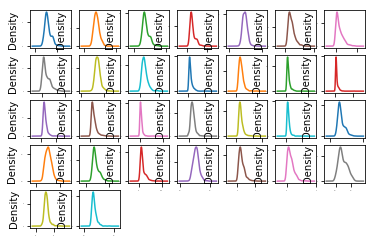

In [30]:
data.plot(kind='density',subplots=True,layout=(5,7),sharex=False,legend=False,fontsize=1)
plt.show()

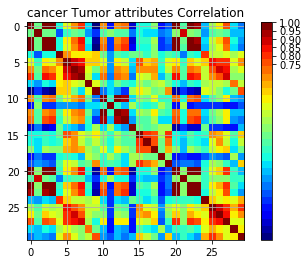

In [31]:
fig=plt.figure()
axl=fig.add_subplot(111)
cmap=cm.get_cmap('jet',30)
cax=axl.imshow(data.corr(),interpolation="none",cmap=cmap)
axl.grid(True)
plt.title('cancer Tumor attributes Correlation')
fig.colorbar(cax,ticks=[.75,.8,.85,.90,.95,1])
plt.show()

In [32]:
Y=data['diagnosis'].values
X=data.drop('diagnosis',axis=1).values

In [33]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33)
model.fit(X_train,Y_train)
#predictdY=model.predict(X_test)
result=model.score(X_test,Y_test)

#print("Accuracy=",(result*100),"%%")
print("Accuracy= {}".format(result))

Accuracy= 0.9468085106382979


In [34]:
num_folds=10
kfold=KFold(n_splits=num_folds)
results=cross_val_score(model,X,Y,cv=kfold)
print("KFold Accuracy=",results.mean())
print(results)

KFold Accuracy= 0.9490601503759397
[0.87719298 0.94736842 0.94736842 0.96491228 0.96491228 0.94736842
 0.98245614 0.94736842 0.94736842 0.96428571]


In [35]:
predicty=model.predict(X_test)
res=list(zip(Y_test,predicty))
print(res)

[('0', '0'), ('0', '0'), ('0', '0'), ('0', '0'), ('1', '1'), ('0', '0'), ('0', '0'), ('1', '1'), ('0', '0'), ('0', '0'), ('0', '0'), ('0', '0'), ('0', '0'), ('0', '0'), ('0', '0'), ('1', '1'), ('0', '0'), ('0', '0'), ('0', '0'), ('1', '1'), ('0', '0'), ('1', '1'), ('0', '0'), ('0', '0'), ('1', '1'), ('1', '1'), ('0', '0'), ('0', '0'), ('1', '1'), ('1', '1'), ('0', '0'), ('0', '0'), ('0', '0'), ('1', '1'), ('0', '0'), ('0', '0'), ('0', '0'), ('0', '0'), ('1', '1'), ('0', '0'), ('1', '1'), ('0', '0'), ('0', '1'), ('0', '0'), ('1', '1'), ('1', '1'), ('0', '0'), ('1', '0'), ('0', '0'), ('0', '0'), ('0', '0'), ('1', '1'), ('0', '0'), ('1', '1'), ('0', '0'), ('1', '1'), ('1', '0'), ('0', '0'), ('0', '0'), ('0', '0'), ('0', '0'), ('0', '0'), ('0', '0'), ('1', '1'), ('1', '0'), ('1', '1'), ('0', '0'), ('0', '0'), ('0', '0'), ('1', '0'), ('0', '0'), ('1', '1'), ('1', '1'), ('0', '0'), ('1', '1'), ('1', '1'), ('0', '0'), ('0', '0'), ('1', '1'), ('0', '0'), ('1', '0'), ('0', '0'), ('0', '0'), ('0

In [13]:
predicty=model.predict(X_test)


In [20]:
predicty

array(['0'], dtype=object)

In [21]:
X_test

array([[2.175e+01, 2.099e+01, 1.473e+02, ..., 1.841e-01, 2.833e-01,
        8.858e-02],
       [9.333e+00, 2.194e+01, 5.901e+01, ..., 2.564e-02, 2.435e-01,
        7.393e-02],
       [1.955e+01, 2.321e+01, 1.289e+02, ..., 1.825e-01, 2.576e-01,
        7.602e-02],
       ...,
       [1.176e+01, 1.814e+01, 7.500e+01, ..., 7.160e-02, 1.978e-01,
        6.915e-02],
       [1.861e+01, 2.025e+01, 1.221e+02, ..., 1.490e-01, 2.341e-01,
        7.421e-02],
       [1.381e+01, 2.375e+01, 9.156e+01, ..., 2.013e-01, 4.432e-01,
        1.086e-01]])

In [22]:
X_test[1]

array([9.333e+00, 2.194e+01, 5.901e+01, 2.640e+02, 9.240e-02, 5.605e-02,
       3.996e-02, 1.282e-02, 1.692e-01, 6.576e-02, 3.013e-01, 1.879e+00,
       2.121e+00, 1.786e+01, 1.094e-02, 1.834e-02, 3.996e-02, 1.282e-02,
       3.759e-02, 4.623e-03, 9.845e+00, 2.505e+01, 6.286e+01, 2.958e+02,
       1.103e-01, 8.298e-02, 7.993e-02, 2.564e-02, 2.435e-01, 7.393e-02])

In [23]:
predicty=model.predict([[1.190e+01, 1.465e+01, 7.811e+01, 4.328e+02, 1.152e-01, 1.296e-01,
       3.710e-02, 3.003e-02, 1.995e-01, 7.839e-02, 3.962e-01, 6.538e-01,
       3.021e+00, 2.503e+01, 1.017e-02, 4.741e-02, 2.789e-02, 1.110e-02,
       3.127e-02, 9.423e-03, 1.315e+01, 1.651e+01, 8.626e+01, 5.096e+02,
       1.424e-01, 2.517e-01, 9.420e-02, 6.042e-02, 2.727e-01, 1.036e-01]])

In [24]:
predicty


array(['0'], dtype=object)

In [1]:
axl.imshow

NameError: name 'axl' is not defined